In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras import Sequential, layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

CLASSES = ['human', 'ball']  # 0 for human, 1 for ball

# DATA PREPROCESSING

In [2]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    extensions = ('.jpg', '.jpeg', '.png')
    
    for filename in os.listdir(folder):
        if filename.lower().endswith(extensions):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            if img is not None:
                
                # all images will be 128 by 128
                img = cv2.resize(img, (128, 128))
                
                # from bgr (opencv) to rgb for data processing
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
                images.append(img)
                labels.append(label)
    return images, labels

# loading images
human_images, human_labels = load_images_from_folder(os.path.join('.', 'human'), 0)
ball_images, ball_labels = load_images_from_folder(os.path.join('.', 'ball'), 1)

# joining together human and ball images and labels and converting to arrays
all_images = human_images + ball_images
all_images = np.array(all_images)
all_labels = human_labels + ball_labels
all_labels = np.array(all_labels)

print("Total images:", len(all_images))
print(f"human: {len(human_images)}, ball: {len(ball_images)}")
print()


#splitting dataset (80% train, 20% test, with stratifiction because of images disbalance - there's more human images than ball)
x_train, x_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42, stratify=all_labels)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape:  {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")

#normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

# one hot encoding
y_train_one_hot = keras.utils.to_categorical(y_train, num_classes=2)
y_test_one_hot = keras.utils.to_categorical(y_test, num_classes=2)


Total images: 1571
human: 1352, ball: 219

x_train shape: (1256, 128, 128, 3)
x_test shape:  (315, 128, 128, 3)
y_train shape: (1256,)
y_test shape:  (315,)


# TRAINING

In [8]:
# Model
model = Sequential([
    # layer 1
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    #layer 2
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    # layer 3
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    
    layers.Dense(2, activation='softmax')  # 2 probabilities for 2 classes
])

# compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# data augmentation
aug = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# train
history = model.fit(aug.flow(x_train, y_train_one_hot), validation_data=(x_test, y_test_one_hot), batch_size=64, epochs=80)

Epoch 1/80


c:\Users\maria\OneDrive\Documents\Dev\CompVis\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - accuracy: 0.7237 - loss: 0.6976 - val_accuracy: 0.8381 - val_loss: 0.4662
Epoch 2/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.8615 - loss: 0.4130 - val_accuracy: 0.8603 - val_loss: 0.3697
Epoch 3/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 178ms/step - accuracy: 0.8774 - loss: 0.3554 - val_accuracy: 0.9016 - val_loss: 0.3109
Epoch 4/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step - accuracy: 0.8869 - loss: 0.2986 - val_accuracy: 0.8603 - val_loss: 0.4300
Epoch 5/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 181ms/step - accuracy: 0.9053 - loss: 0.2703 - val_accuracy: 0.9016 - val_loss: 0.3543
Epoch 6/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 178ms/step - accuracy: 0.9100 - loss: 0.2463 - val_accuracy: 0.9016 - val_loss: 0.3223
Epoch 7/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 199ms/step - accuracy: 0.9100 - loss: 0.2344 - val_accuracy: 0.8762 - val_loss: 0.3213
Epoch 8/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 182ms/step - accuracy: 0.9156 - loss: 0.2369 - val_accuracy: 0.8381 - val_

# EVALUATION

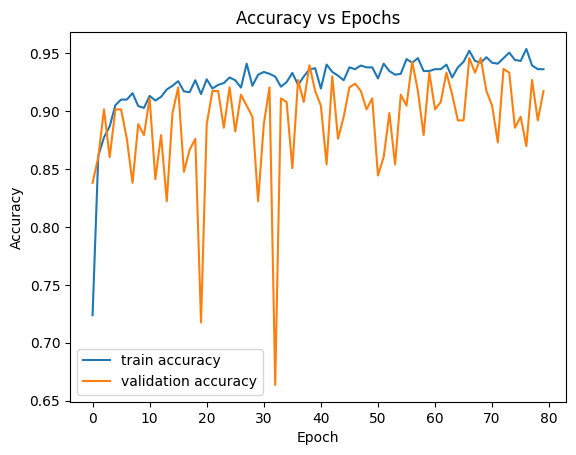

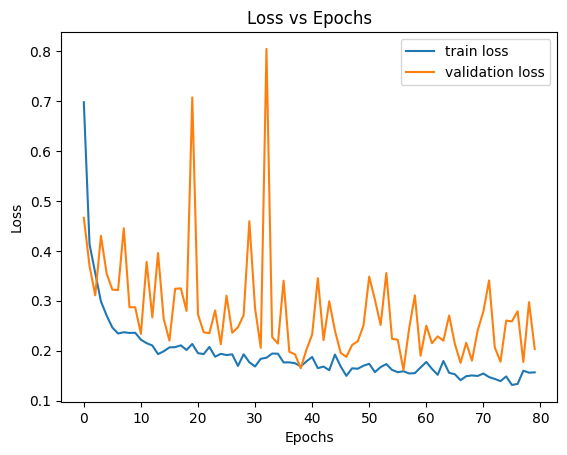

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


<Figure size 1200x1000 with 0 Axes>

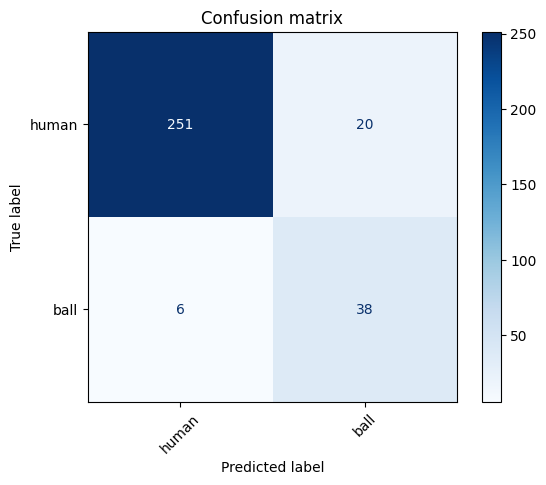

In [9]:
# accuracy and loss diagrams for train and validation
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

# class predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASSES)
plt.figure(figsize=(12, 10))
display.plot(cmap='Blues', xticks_rotation=45)
plt.title('Confusion matrix')
plt.show()


# SAVING MODEL

In [12]:
model.save('human_vs_ball_identifier.h5')
print("Model saved.")

Model saved.
